# Exploratory Data Analysis (EDA): Netflix Movies and TV Shows

ผู้จัดทำ: **6524421014 ภูริพัฒนชัย รัตนาธรรม**

งาน: **การวิเคราะห์ข้อมูลเชิงสำรวจ (EDA) บน Kaggle Notebook**

---

## 1) วัตถุประสงค์และสมมติฐาน (Objective & Hypothesis)
เลือกชุดข้อมูล Netflix เพราะเป็นแพลตฟอร์มที่คนส่วนใหญ่รู้จักและใช้งานกันอยู่แล้ว ทำให้การตีความและเล่าเรื่องจากข้อมูลทำได้ง่ายและเข้าใจไม่ยาก อีกทั้งยังเป็นหัวข้อที่น่าสนใจในการวิเคราะห์แนวโน้มของคอนเทนต์ที่ผู้ชมเข้าถึง


**คำถามวิจัย**
1. ประเทศใดเป็นผู้ผลิตคอนเทนต์บน Netflix มากที่สุด?
2. แนว/หมวดหมู่ใดถูกนำเสนอมากที่สุดบนแพลตฟอร์ม?
3. จำนวนคอนเทนต์ที่ถูกเพิ่มเข้า Netflix มีการเปลี่ยนแปลงไปอย่างไร โดยเฉพาะหลังปี 2015 ที่ถือเป็นช่วงเติบโตสำคัญของแพลตฟอร์ม?


## Setup & Imports  
ในส่วนนี้เราจะทำการนำเข้าไลบรารีหลักที่จำเป็นสำหรับการวิเคราะห์ข้อมูล ได้แก่ 
- **pandas / numpy** ใช้สำหรับการจัดการตารางข้อมูลและการคำนวณทางสถิติ 
- **matplotlib** สำหรับสร้างกราฟและการแสดงผลข้อมูลในรูปแบบภาพ

นอกจากนี้ยังมีการตั้งค่าพื้นฐาน เช่น ขนาดของกราฟ และกำหนดโทนสีประจำ (แดงเข้มและเทาเข้มตามโทนของ Netflix) เพื่อให้กราฟที่ได้มีรูปแบบที่ชัดเจนและสอดคล้องกันตลอดทั้งงาน

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = (10, 6)
pd.set_option('display.max_columns', None)

PRIMARY = '#831010'   # แดง Netflix
SECONDARY = '#564d4d' # เทาเข้ม Netflix

## Load Dataset  
ทำการโหลดชุดข้อมูล Netflix ที่ได้มาจาก Kaggle (netflix_titles.csv) เข้ามาใช้งาน จากนั้นจะแสดงตัวอย่างข้อมูลจำนวน 5 แถวแรก เพื่อดูโครงสร้างของข้อมูล และตรวจสอบเบื้องต้นว่าข้อมูลถูกดึงเข้ามาครบถ้วน

In [19]:
PATH = '/kaggle/input/netflix-shows/netflix_titles.csv'
df = pd.read_csv(PATH)
df = df.replace([np.inf, -np.inf], np.nan)
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


## 2. ภาพรวมของชุดข้อมูล (Dataset Overview)

ชุดข้อมูลนี้เป็นข้อมูลเกี่ยวกับคอนเทนต์บน **Netflix**  
ซึ่งประกอบไปด้วยภาพยนตร์ (Movies) และซีรีส์ (TV Shows)  
โดยในแต่ละแถวจะเป็นข้อมูลของคอนเทนต์หนึ่งเรื่อง พร้อมรายละเอียด  
เช่น ชื่อเรื่อง ผู้กำกับ นักแสดง ประเทศผู้ผลิต แนว (Genre)  
รวมถึงปีที่ออกฉายและวันที่ถูกเพิ่มเข้ามาในแพลตฟอร์ม  

ข้อมูลนี้นำมาจาก **Kaggle Dataset: [Netflix Movies and TV Shows](https://www.kaggle.com/datasets/shivamb/netflix-shows)**  
ซึ่งถูกรวบรวมจากหน้าเว็บไซต์ Netflix เอง เพื่อใช้สำหรับการวิเคราะห์แนวโน้มและรูปแบบของคอนเทนต์บนแพลตฟอร์ม  

เบื้องต้นมีการตรวจสอบข้อมูลเบื้องต้นด้วย 3 ขั้นตอนหลัก:  
- **Shape** → ตรวจสอบจำนวนแถว (rows) และคอลัมน์ (columns) ของชุดข้อมูล  
- **Sample(5)** → แสดงตัวอย่างข้อมูลแบบสุ่ม 5 แถว เพื่อดูโครงสร้างจริงของข้อมูล  
- **Info()** → ตรวจสอบชื่อคอลัมน์ ชนิดข้อมูล (dtype) และจำนวนค่าที่ไม่เป็นค่าว่าง (non-null)

> **รูปประกอบที่สื่อความหมาย:**  
> การแสดงผลจาก `df.sample(5)` และ `df.info()` ใช้เป็นตัวอย่างข้อมูลจริงของ Dataset  
> ซึ่งช่วยให้เข้าใจโครงสร้างและชนิดข้อมูลได้อย่างชัดเจน

---

### Data Dictionary (คำอธิบายคอลัมน์)

| Column | ความหมาย | ชนิดข้อมูล (dtype) |
|:--|:--|:--|
| show_id | รหัสประจำเรื่อง (ID ของแต่ละรายการ) | object |
| type | ประเภทคอนเทนต์ (Movie หรือ TV Show) | object |
| title | ชื่อเรื่อง | object |
| director | ชื่อผู้กำกับ | object |
| cast | รายชื่อนักแสดง | object |
| country | ประเทศผู้ผลิต | object |
| date_added | วันที่ถูกเพิ่มเข้า Netflix | object |
| release_year | ปีที่ออกฉายครั้งแรก | int64 |
| rating | เรทอายุผู้ชม (เช่น TV-MA, TV-14) | object |
| duration | ความยาว (นาที สำหรับภาพยนตร์ หรือจำนวน seasons สำหรับซีรีส์) | object |
| listed_in | หมวดหมู่/แนวของคอนเทนต์ (คั่นด้วยเครื่องหมายจุลภาค) | object |
| description | คำอธิบายสั้น ๆ เกี่ยวกับคอนเทนต์ | object |


In [20]:
print('Shape:', df.shape)
display(df.sample(5))
df.info()

Shape: (8807, 12)


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
278,s279,Movie,Lokillo: Nothing's the Same,Julián Gaviria,Lokillo Florez,Colombia,"August 12, 2021",2021,TV-MA,64 min,Stand-Up Comedy,"Through songs and puns, comedian Lokillo Flore..."
5647,s5648,Movie,Autohead,Rohit Mittal,"Deepak Sampat, Ronjini Chakroborty, Vikrant Si...",India,"January 1, 2017",2016,TV-MA,97 min,"Dramas, International Movies, Thrillers",A production crew that thinks it's making a do...
8547,s8548,Movie,The Unknown Known,Errol Morris,"Donald Rumsfeld, Errol Morris",United States,"February 22, 2019",2013,PG-13,103 min,Documentaries,Donald Rumsfeld reviews his long political car...
566,s567,Movie,Charlie's Angels,McG,"Cameron Diaz, Drew Barrymore, Lucy Liu, Bill M...","United States, Germany","July 1, 2021",2000,PG-13,98 min,"Action & Adventure, Comedies",A tight-knit trio of specially trained agents ...
1586,s1587,TV Show,Room 2806: The Accusation,Jalil Lespert,NaN,France,"December 7, 2020",2020,TV-MA,1 Season,"Crime TV Shows, Docuseries, International TV S...",This docuseries follows the 2011 sexual assaul...


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


## 3. การตรวจสอบคุณภาพข้อมูลและสถิติเบื้องต้น (Data Quality & Statistics)

ก่อนเริ่มการวิเคราะห์ข้อมูล ได้ทำการตรวจสอบคุณภาพของชุดข้อมูล เพื่อให้มั่นใจว่าข้อมูลมีความสมบูรณ์และพร้อมใช้งาน โดยมีขั้นตอนดังนี้:

### การตรวจสอบข้อมูลที่หายไป (Missing Values) และข้อมูลซ้ำซ้อน (Duplicates)

จากการตรวจสอบพบว่า **ไม่มีข้อมูลซ้ำซ้อน (Duplicates = 0)**  
แต่มีบางคอลัมน์ที่มีข้อมูลหาย (Missing Values) โดยมากที่สุดคือ  
**`director` (2634 ค่า)** รองลงมาคือ `country` (831 ค่า), `cast` (825 ค่า) และ `date_added` (10 ค่า)

| Column | Missing Count |
|:--|:--:|
| director | 2634 |
| country | 831 |
| cast | 825 |
| date_added | 10 |
| rating | 4 |
| duration | 3 |

> สรุป: คอลัมน์ที่มีข้อมูลหายเป็นคอลัมน์เชิงข้อความ จึงไม่กระทบต่อการวิเคราะห์เชิงสถิติหลัก

---

### ค่าสถิติเบื้องต้นของข้อมูล (Descriptive Statistics)

จากการใช้คำสั่ง `.describe()`  
- ตัวแปรเชิงตัวเลข (`release_year`) มีค่าปีเฉลี่ยอยู่ที่ **2014** และช่วงปีครอบคลุมระหว่าง **1925–2021**  
- ตัวแปรเชิงข้อความ (object) พบว่า:
  - `type` มี 2 ประเภท คือ Movie และ TV Show  
  - `rating` มีทั้งหมด 17 ประเภท โดย **TV-MA** พบมากที่สุด  
  - `country` มีประเทศผู้ผลิตทั้งหมด 748 ประเทศ โดย **United States** พบมากที่สุด

---

### สิ่งที่สังเกตได้จากข้อมูล

- ข้อมูลไม่มีแถวซ้ำซ้อน  
- มีคอลัมน์ที่มี Missing Values หลายคอลัมน์ โดยเฉพาะ `director`  
- ชุดข้อมูลมีความหลากหลาย ทั้งประเภทคอนเทนต์ เรตติ้ง และประเทศผู้ผลิต  
ซึ่งแสดงให้เห็นถึงความครอบคลุมของข้อมูลก่อนนำไปวิเคราะห์เชิงลึกในหัวข้อถัดไป


In [21]:
missing = df.isna().sum().sort_values(ascending=False)
dup_count = df.duplicated().sum()
print('Duplicates:', dup_count)
display(missing.to_frame('missing_count'))
display(df.describe(include='number').T)
display(df.describe(include='object').T)
for col in ['type', 'rating', 'country']:
    print(f"\nTop values in: {col}")
    display(df[col].value_counts(dropna=False).head(10))

Duplicates: 0


,missing_count
director,2634
country,831
cast,825
date_added,10
rating,4
duration,3
show_id,0
type,0
title,0
release_year,0


,count,mean,std,min,25%,50%,75%,max
release_year,8807.0,2014.180198,8.819312,1925.0,2013.0,2017.0,2019.0,2021.0


,count,unique,top,freq
show_id,8807,8807,s1,1
type,8807,2,Movie,6131
title,8807,8807,Dick Johnson Is Dead,1
director,6173,4528,Rajiv Chilaka,19
cast,7982,7692,David Attenborough,19
country,7976,748,United States,2818
date_added,8797,1767,"January 1, 2020",109
rating,8803,17,TV-MA,3207
duration,8804,220,1 Season,1793
listed_in,8807,514,"Dramas, International Movies",362



Top values in: type


type
Movie      6131
TV Show    2676
Name: count, dtype: int64


Top values in: rating


rating
TV-MA    3207
TV-14    2160
TV-PG     863
R         799
PG-13     490
TV-Y7     334
TV-Y      307
PG        287
TV-G      220
NR         80
Name: count, dtype: int64


Top values in: country


country
United States     2818
India              972
NaN                831
United Kingdom     419
Japan              245
South Korea        199
Canada             181
Spain              145
France             124
Mexico             110
Name: count, dtype: int64

## Date Parsing    
คอลัมน์ `date_added` ถูกเก็บอยู่ในรูปแบบข้อความ (string) ซึ่งไม่สะดวกต่อการวิเคราะห์ตามเวลา ดังนั้นเราจะแปลงให้เป็นชนิดวันที่ (datetime) เพื่อให้สามารถดูแนวโน้มตามปีและเดือนต่อไปได้

หลังจากแปลงแล้ว เราจะสร้างคอลัมน์ใหม่ 2 ตัวแปรสำหรับการใช้งานเพิ่มเติมคือ:
- **year_added** → ปีที่คอนเทนต์ถูกเพิ่มเข้า Netflix  
- **month_added** → เดือนที่คอนเทนต์ถูกเพิ่มเข้า Netflix

> ผลจากการแปลงข้อมูล พบว่ามีบางรายการที่ไม่มีวันที่ถูกเพิ่มเข้าสู่ระบบ (ค่า NaT)  
> เช่น *Friends* และ *Frasier* ซึ่งจะไม่ถูกนำมาวิเคราะห์ในส่วนของแนวโน้มตามเวลาในขั้นถัดไป

In [22]:
date_str = df['date_added'].astype(str).str.strip().replace({'': np.nan})
df['date_added'] = pd.to_datetime(date_str, errors='coerce')
df['year_added']  = df['date_added'].dt.year
df['month_added'] = df['date_added'].dt.month
df.loc[df['date_added'].isna(), ['title', 'date_added']].head(5)

,title,date_added
6066,A Young Doctor's Notebook and Other Stories,NaT
6174,Anthony Bourdain: Parts Unknown,NaT
6795,Frasier,NaT
6806,Friends,NaT
6901,Gunslinger Girl,NaT


## 4. การวิเคราะห์ข้อมูลด้วยภาพ (Data Visualization & Analysis)  

หลังจากตรวจสอบและจัดการคุณภาพของข้อมูลเรียบร้อยแล้ว  
ขั้นตอนต่อมาคือการนำข้อมูลมาวิเคราะห์เชิงภาพ (Data Visualization) เพื่อให้เห็นแนวโน้ม รูปแบบการกระจาย และความสัมพันธ์ของข้อมูลได้อย่างชัดเจนมากขึ้น  

การวิเคราะห์ในส่วนนี้แบ่งออกเป็น **2 ส่วนหลัก** ได้แก่:  

- **4.1 Univariate Analysis** → การวิเคราะห์ “ตัวแปรเดียว” เพื่อดูการกระจายตัวของข้อมูล เช่น การเปรียบเทียบจำนวน *Movies* และ *TV Shows* หรือการกระจายของปีที่คอนเทนต์ถูกเพิ่มเข้ามาใน Netflix  
- **4.2 Bivariate Analysis** → การวิเคราะห์ “ความสัมพันธ์ระหว่างสองตัวแปร” เช่น ความสัมพันธ์ระหว่างประเภทคอนเทนต์กับปีที่ถูกเพิ่ม หรือแนวคอนเทนต์กับเรตติ้งผู้ชม  

ทุกกราฟในส่วนนี้ได้ถูกออกแบบให้มี  
- **ชื่อกราฟ (Title)**  
- **ชื่อแกน X และแกน Y ที่ชัดเจน**  
- และ **คำอธิบายใต้ภาพ (Interpretation)** เพื่อช่วยสรุปสิ่งที่ค้นพบจากการแสดงผล  

โดยใช้โทนสีหลักของ Netflix ได้แก่ **แดงเข้ม (`#831010`) และเทาเข้ม (`#564d4d`)**  
เพื่อให้ภาพรวมของการนำเสนอมีความสอดคล้องและดูเป็นเอกลักษณ์ในธีมเดียวกัน 

### 4.1 Univariate Analysis

การวิเคราะห์ตัวแปรเดียว (Univariate Analysis) เป็นการดูการกระจายตัวของข้อมูลในแต่ละตัวแปร  
เพื่อให้เข้าใจลักษณะของชุดข้อมูลก่อนเข้าสู่การวิเคราะห์เชิงความสัมพันธ์

---

### 4.1.1 Count of Movies vs TV Shows  
กราฟนี้ใช้เพื่อเปรียบเทียบจำนวนคอนเทนต์ที่เป็น *Movies* และ *TV Shows* บน Netflix  
เพื่อให้เห็นชัดเจนว่าสัดส่วนประเภทใดมีมากกว่ากัน โดยจะช่วยบอกแนวโน้มว่า  
แพลตฟอร์มนี้เน้นนำเสนอภาพยนตร์ตอนเดียวจบ หรือซีรีส์หลายตอนมากกว่ากัน

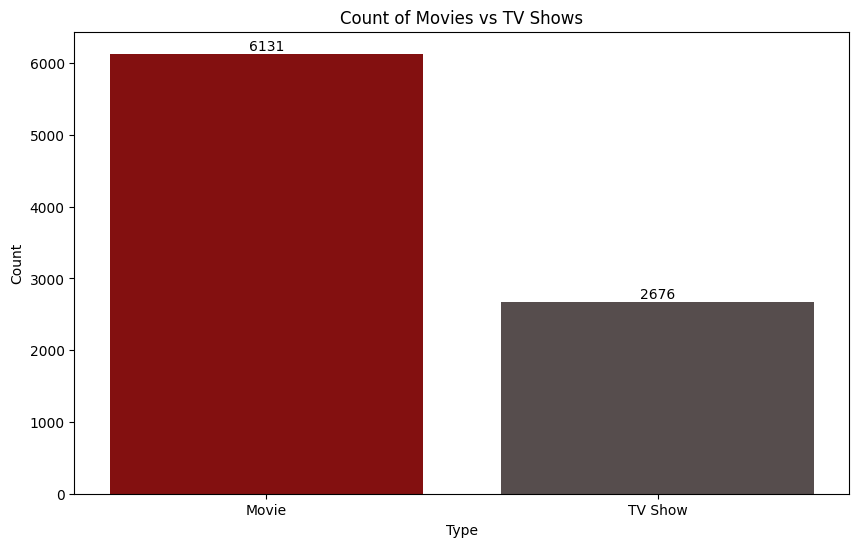

คำอธิบาย: จากกราฟจะเห็นได้ว่า Netflix มีภาพยนตร์ (Movie) มากกว่า ซีรีส์ (TV Show) อย่างชัดเจน แสดงให้เห็นว่าคอนเทนต์ส่วนใหญ่บนแพลตฟอร์มยังคงเป็นภาพยนตร์ตอนเดียวจบมากกว่าซีรีส์หลายตอน


In [23]:
counts = df['type'].value_counts()
fig, ax = plt.subplots()
ax.bar(counts.index, counts.values, color=[PRIMARY, SECONDARY][:len(counts)])
ax.set_title('Count of Movies vs TV Shows')
ax.set_xlabel('Type'); ax.set_ylabel('Count')
for i, v in enumerate(counts.values):
    ax.text(i, v, f'{v}', ha='center', va='bottom')
plt.show()
print("คำอธิบาย: จากกราฟจะเห็นได้ว่า Netflix มีภาพยนตร์ (Movie) มากกว่า ซีรีส์ (TV Show) อย่างชัดเจน แสดงให้เห็นว่าคอนเทนต์ส่วนใหญ่บนแพลตฟอร์มยังคงเป็นภาพยนตร์ตอนเดียวจบมากกว่าซีรีส์หลายตอน")

### 4.1.2 Top 10 Ratings on Netflix  
กราฟนี้แสดงให้เห็นว่าเรทอายุประเภทใดถูกใช้บ่อยที่สุดบน Netflix  
เช่น **TV-MA** หรือ **TV-14** ซึ่งช่วยให้เราเข้าใจได้ว่า  
แพลตฟอร์มนี้มีคอนเทนต์ที่เหมาะกับกลุ่มผู้ชมวัยไหนเป็นหลัก

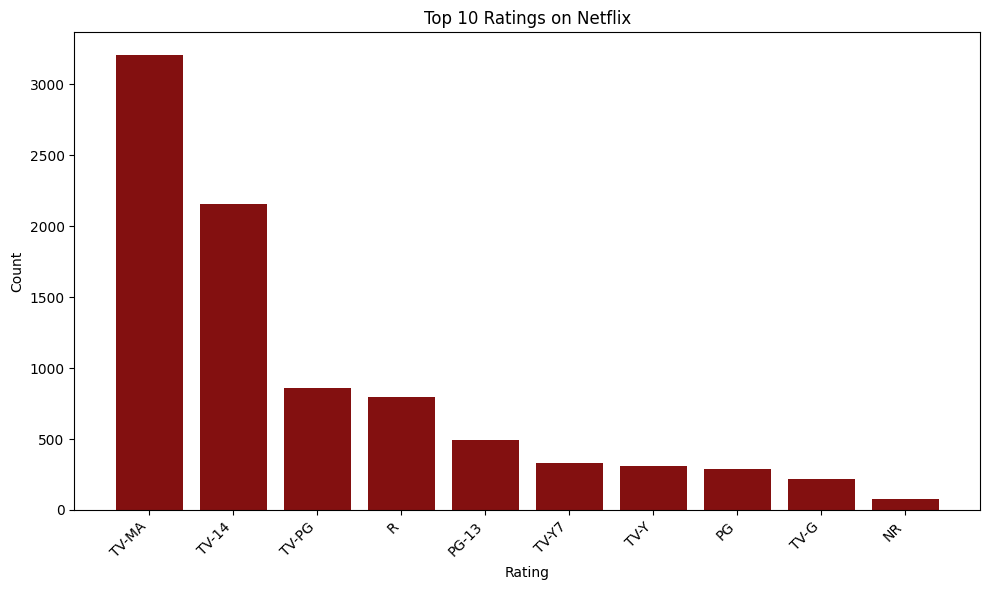

คำอธิบาย: จากผลลัพธ์พบว่าเรทที่ปรากฏบ่อยที่สุดคือ TV-MA รองลงมาคือ TV-14 ซึ่งสะท้อนว่า Netflix มีคอนเทนต์สำหรับผู้ใหญ่และวัยรุ่นในสัดส่วนที่ค่อนข้างมาก


In [24]:
vc = df['rating'].value_counts().head(10)
fig, ax = plt.subplots()
ax.bar(vc.index, vc.values, color=PRIMARY)
ax.set_title('Top 10 Ratings on Netflix')
ax.set_xlabel('Rating'); ax.set_ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout(); plt.show()
print("คำอธิบาย: จากผลลัพธ์พบว่าเรทที่ปรากฏบ่อยที่สุดคือ TV-MA รองลงมาคือ TV-14 ซึ่งสะท้อนว่า Netflix มีคอนเทนต์สำหรับผู้ใหญ่และวัยรุ่นในสัดส่วนที่ค่อนข้างมาก")

### 4.1.3 Distribution of Release Years  
กราฟนี้ใช้เพื่อดูการกระจายของปีที่คอนเทนต์ออกฉายบน Netflix  
เพื่อให้เข้าใจว่าผลงานส่วนใหญ่มาจากช่วงเวลาใด และมีแนวโน้มการผลิตเพิ่มขึ้นหรือลดลงในแต่ละช่วงปี

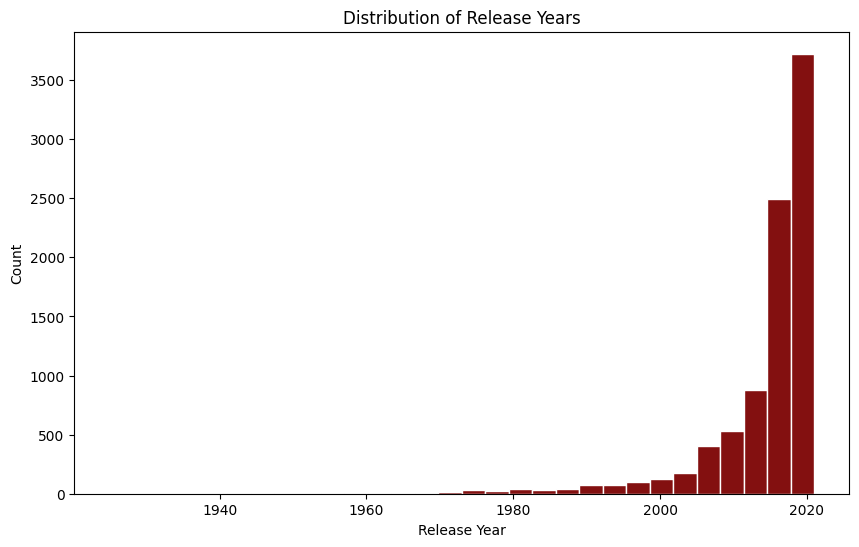

คำอธิบาย: ส่วนใหญ่ของคอนเทนต์ถูกผลิตหลังปี 2000 และมีจำนวนเพิ่มขึ้นอย่างชัดเจนในช่วงสิบปีที่ผ่านมา ซึ่งสอดคล้องกับการเติบโตของบริการสตรีมมิงทั่วโลก


In [25]:
fig, ax = plt.subplots()
ax.hist(df['release_year'].dropna(), bins=30, color=PRIMARY, edgecolor='white')
ax.set_title('Distribution of Release Years')
ax.set_xlabel('Release Year'); ax.set_ylabel('Count')
plt.show()
print("คำอธิบาย: ส่วนใหญ่ของคอนเทนต์ถูกผลิตหลังปี 2000 และมีจำนวนเพิ่มขึ้นอย่างชัดเจนในช่วงสิบปีที่ผ่านมา ซึ่งสอดคล้องกับการเติบโตของบริการสตรีมมิงทั่วโลก")

### 4.1.4 Top 10 Countries with Most Netflix Content  
กราฟนี้แสดง 10 อันดับประเทศที่มีการผลิตคอนเทนต์บน Netflix มากที่สุด  
เพื่อให้เห็นว่าประเทศใดเป็นฐานการผลิตหลักของแพลตฟอร์ม และช่วยสะท้อนถึงความหลากหลายของแหล่งที่มาคอนเทนต์

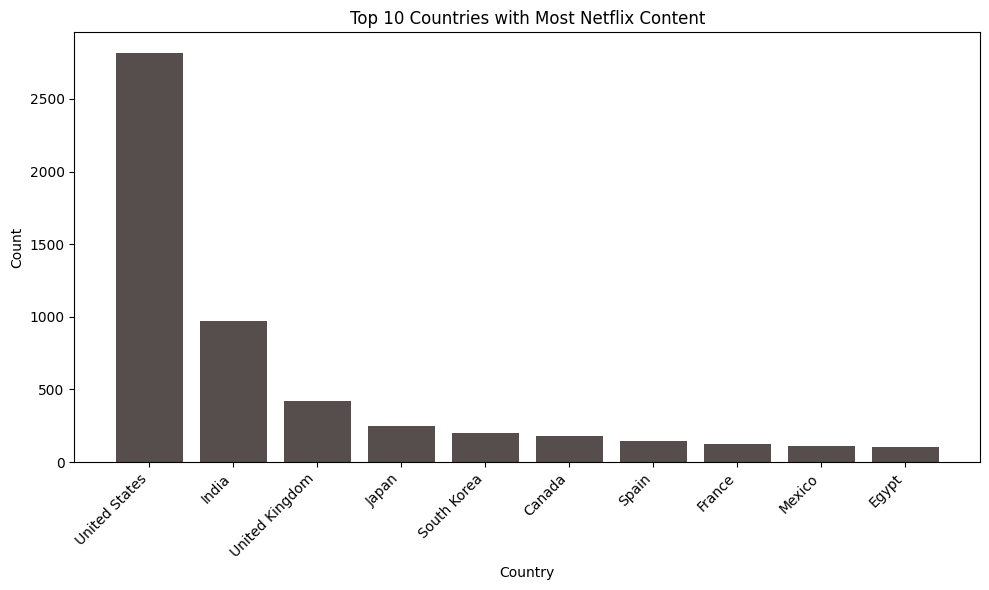

คำอธิบาย: จากกราฟจะเห็นว่าสหรัฐอเมริกาครองอันดับหนึ่ง ตามมาด้วยอินเดียและสหราชอาณาจักร ซึ่งสะท้อนให้เห็นว่าประเทศเหล่านี้เป็นฐานการผลิตคอนเทนต์หลักของ Netflix


In [26]:
country_top = df['country'].value_counts().head(10)
fig, ax = plt.subplots()
ax.bar(country_top.index, country_top.values, color=[SECONDARY]*len(country_top))
ax.set_title('Top 10 Countries with Most Netflix Content')
ax.set_xlabel('Country'); ax.set_ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout(); plt.show()
print("คำอธิบาย: จากกราฟจะเห็นว่าสหรัฐอเมริกาครองอันดับหนึ่ง ตามมาด้วยอินเดียและสหราชอาณาจักร ซึ่งสะท้อนให้เห็นว่าประเทศเหล่านี้เป็นฐานการผลิตคอนเทนต์หลักของ Netflix")

### 4.1.5 Number of Content Added by Year  
กราฟนี้ใช้เพื่อดูแนวโน้มจำนวนคอนเทนต์ที่ถูกเพิ่มเข้า Netflix ในแต่ละปี  
เพื่อบอกให้เห็นว่าปริมาณคอนเทนต์มีการเพิ่มขึ้นหรือลดลงอย่างไร และช่วยสะท้อนช่วงเวลาที่ Netflix ขยายตัวหรือมีการลงทุนในคอนเทนต์มากเป็นพิเศษ

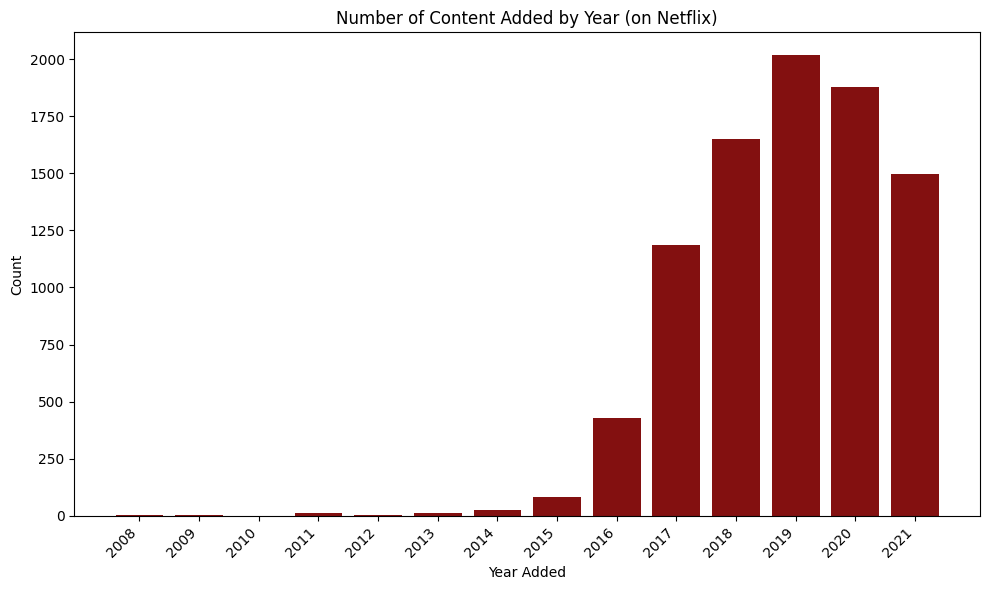

คำอธิบาย: จากกราฟจะเห็นว่าจำนวนคอนเทนต์เพิ่มขึ้นอย่างชัดเจนหลังปี 2015 ซึ่งเป็นช่วงที่ Netflix เริ่มขยายตลาดไปทั่วโลกและลงทุนผลิต Original Content มากขึ้น


In [27]:
year_counts = df['year_added'].dropna().astype(int).value_counts().sort_index()
fig, ax = plt.subplots()
ax.bar(year_counts.index.astype(str), year_counts.values, color=PRIMARY)

ax.set_title('Number of Content Added by Year (on Netflix)')
ax.set_xlabel('Year Added'); ax.set_ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout(); plt.show()

print("คำอธิบาย: จากกราฟจะเห็นว่าจำนวนคอนเทนต์เพิ่มขึ้นอย่างชัดเจนหลังปี 2015 "
      "ซึ่งเป็นช่วงที่ Netflix เริ่มขยายตลาดไปทั่วโลกและลงทุนผลิต Original Content มากขึ้น")

### 4.1.6 Top 10 Genres on Netflix  
กราฟนี้แสดง 10 อันดับแนวหนังและซีรีส์ที่ถูกนำเสนอมากที่สุดบน Netflix  
เช่น **Drama**, **Comedy** หรือ **International** เพื่อช่วยให้เราเห็นว่า  
แนวคอนเทนต์ใดได้รับความนิยมและถูกผลิตออกมามากที่สุดบนแพลตฟอร์ม

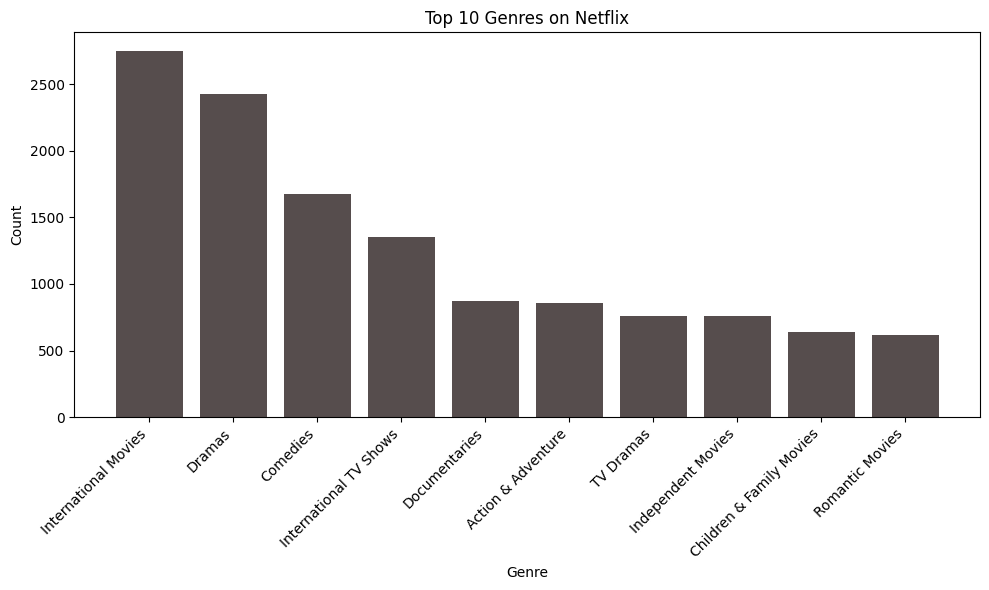

คำอธิบาย: จากกราฟจะเห็นว่าแนวที่ปรากฏบ่อยที่สุด ได้แก่ Drama และ Comedy ซึ่งสะท้อนว่าคอนเทนต์กระแสหลักยังคงได้รับความนิยมสูง ขณะเดียวกันหมวด International ก็แสดงให้เห็นถึงการเติบโตของคอนเทนต์หลากหลายภาษาที่เข้ามาในแพลตฟอร์มมากขึ้น


In [28]:
genres = df['listed_in'].dropna().str.split(', ').explode()
top_genres = genres.value_counts().head(10)
fig, ax = plt.subplots()
ax.bar(top_genres.index, top_genres.values, color=[SECONDARY]*len(top_genres))
ax.set_title('Top 10 Genres on Netflix')
ax.set_xlabel('Genre'); ax.set_ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout(); plt.show()
print("คำอธิบาย: จากกราฟจะเห็นว่าแนวที่ปรากฏบ่อยที่สุด ได้แก่ Drama และ Comedy "
      "ซึ่งสะท้อนว่าคอนเทนต์กระแสหลักยังคงได้รับความนิยมสูง ขณะเดียวกันหมวด International "
      "ก็แสดงให้เห็นถึงการเติบโตของคอนเทนต์หลากหลายภาษาที่เข้ามาในแพลตฟอร์มมากขึ้น")

### 4.2 Bivariate Analysis

การวิเคราะห์แบบสองตัวแปร (Bivariate Analysis)  
เป็นขั้นตอนที่ใช้เพื่อศึกษาความสัมพันธ์ระหว่างตัวแปรสองตัวขึ้นไปในชุดข้อมูล  
โดยในส่วนนี้จะเลือกคู่ตัวแปรที่คาดว่ามีความสัมพันธ์กันและสามารถอธิบายแนวโน้มของคอนเทนต์บน Netflix ได้

---

### 4.2.1 Year Added vs Type  

กราฟนี้แสดงจำนวนของคอนเทนต์ที่ถูกเพิ่มเข้า Netflix ในแต่ละปี  
โดยแยกตามประเภท **Movies** และ **TV Shows** เพื่อดูแนวโน้มการเติบโตของแต่ละประเภทในช่วงเวลาเดียวกัน

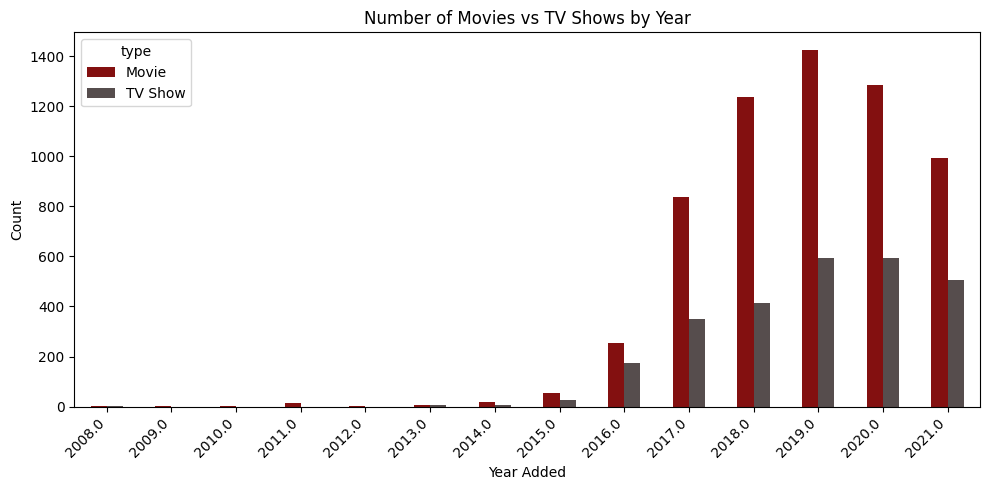

คำอธิบาย: จากกราฟจะเห็นว่าในช่วงหลังปี 2015 จำนวนคอนเทนต์ที่เพิ่มขึ้นใน Netflix มีแนวโน้มสูงขึ้นทั้งในส่วนของ Movies และ TV Shows โดยเฉพาะช่วงปี 2018–2020 ซึ่งเป็นช่วงที่ Netflix ขยายบริการไปทั่วโลกและเริ่มลงทุนสร้าง Original Content มากขึ้น


In [29]:
type_year = df.groupby(['year_added', 'type']).size().unstack(fill_value=0)
fig, ax = plt.subplots(figsize=(10, 5))
type_year.plot(kind='bar', stacked=False, ax=ax, color=[PRIMARY, SECONDARY])

ax.set_title('Number of Movies vs TV Shows by Year')
ax.set_xlabel('Year Added')
ax.set_ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

print("คำอธิบาย: จากกราฟจะเห็นว่าในช่วงหลังปี 2015 จำนวนคอนเทนต์ที่เพิ่มขึ้นใน Netflix "
      "มีแนวโน้มสูงขึ้นทั้งในส่วนของ Movies และ TV Shows โดยเฉพาะช่วงปี 2018–2020 "
      "ซึ่งเป็นช่วงที่ Netflix ขยายบริการไปทั่วโลกและเริ่มลงทุนสร้าง Original Content มากขึ้น")


### 4.2.2 Rating vs Type  

กราฟนี้แสดงการกระจายของเรตติ้งในแต่ละประเภทคอนเทนต์  
เพื่อดูว่าระหว่าง **Movies** และ **TV Shows** มีแนวโน้มอยู่ในเรตใดมากกว่ากัน

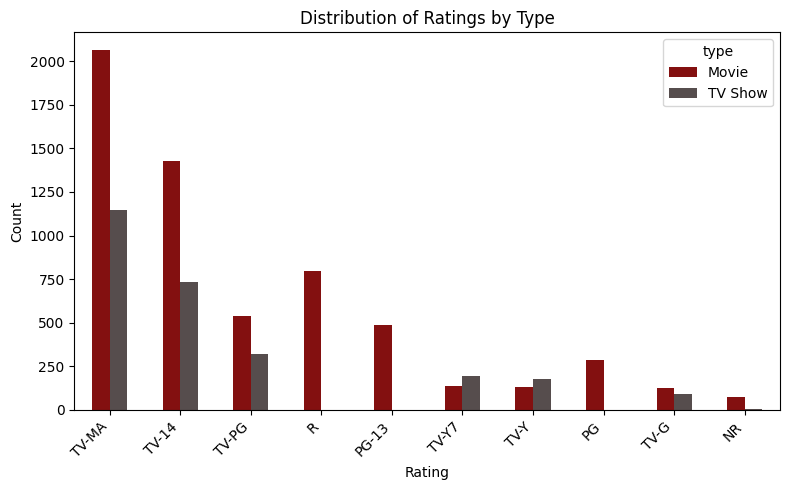

คำอธิบาย: จากกราฟจะเห็นว่าเรตติ้ง TV-MA ปรากฏบ่อยในทั้งสองประเภท แต่ในฝั่งของ TV Shows จะมีเรต TV-14 มากกว่า ซึ่งแสดงให้เห็นว่า Netflix มีแนวโน้มผลิตซีรีส์ที่เหมาะกับผู้ชมวัยรุ่นมากขึ้น


In [30]:
rating_order = df['rating'].value_counts().index[:10]
cross_tab = pd.crosstab(df['rating'], df['type'])
cross_tab = cross_tab.reindex(rating_order)

fig, ax = plt.subplots(figsize=(8, 5))
cross_tab.plot(kind='bar', ax=ax, color=[PRIMARY, SECONDARY])
ax.set_title('Distribution of Ratings by Type')
ax.set_xlabel('Rating')
ax.set_ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

print("คำอธิบาย: จากกราฟจะเห็นว่าเรตติ้ง TV-MA ปรากฏบ่อยในทั้งสองประเภท "
      "แต่ในฝั่งของ TV Shows จะมีเรต TV-14 มากกว่า "
      "ซึ่งแสดงให้เห็นว่า Netflix มีแนวโน้มผลิตซีรีส์ที่เหมาะกับผู้ชมวัยรุ่นมากขึ้น")


### 4.2.3 Release Year vs Year Added  

กราฟนี้ใช้เพื่อดูความสัมพันธ์ระหว่างปีที่คอนเทนต์ถูกผลิต (`release_year`)  
กับปีที่ถูกเพิ่มเข้าสู่แพลตฟอร์ม (`year_added`)  
เพื่อดูว่า Netflix มักเพิ่มคอนเทนต์ที่ผลิตใหม่หรือนำเข้าจากผลงานเก่า

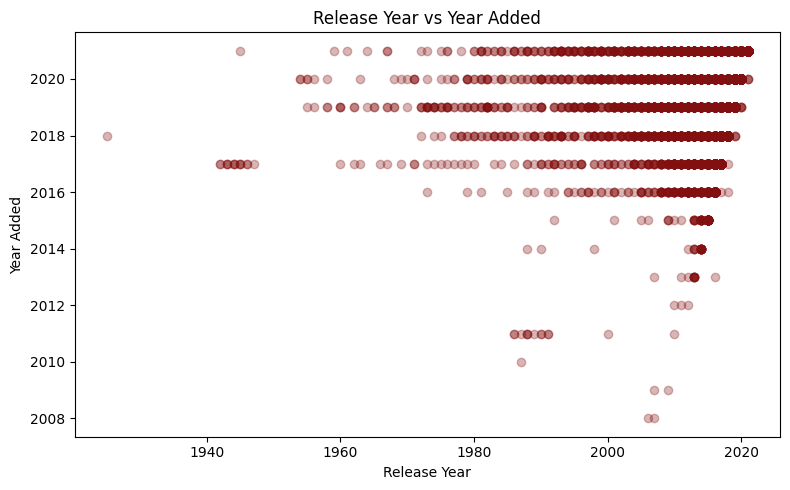

คำอธิบาย: จากกราฟจะเห็นว่าคอนเทนต์ส่วนใหญ่ที่ถูกเพิ่มใน Netflix มักจะเป็นผลงานที่ผลิตในช่วงเวลาใกล้เคียงกัน (ห่างกันไม่เกิน 2–3 ปี) สะท้อนว่า Netflix เน้นเพิ่มคอนเทนต์ใหม่มากกว่าผลงานเก่าที่ออกฉายมานาน


In [31]:
fig, ax = plt.subplots(figsize=(8, 5))
ax.scatter(df['release_year'], df['year_added'], alpha=0.3, color=PRIMARY)
ax.set_title('Release Year vs Year Added')
ax.set_xlabel('Release Year')
ax.set_ylabel('Year Added')
plt.tight_layout()
plt.show()

print("คำอธิบาย: จากกราฟจะเห็นว่าคอนเทนต์ส่วนใหญ่ที่ถูกเพิ่มใน Netflix "
      "มักจะเป็นผลงานที่ผลิตในช่วงเวลาใกล้เคียงกัน (ห่างกันไม่เกิน 2–3 ปี) "
      "สะท้อนว่า Netflix เน้นเพิ่มคอนเทนต์ใหม่มากกว่าผลงานเก่าที่ออกฉายมานาน")


### สรุปผลการวิเคราะห์ Bivariate Analysis

จากการวิเคราะห์แบบสองตัวแปร (Bivariate Analysis) พบความสัมพันธ์ที่น่าสนใจดังนี้:  

- **Year Added vs Type:** หลังปี 2015 ปริมาณคอนเทนต์ทั้ง Movies และ TV Shows เพิ่มขึ้นอย่างชัดเจน  
  โดยเฉพาะช่วงปี 2018–2020 ซึ่งเป็นช่วงที่ Netflix ขยายบริการและผลิต Original Content มากขึ้น  

- **Rating vs Type:** คอนเทนต์ส่วนใหญ่ในทั้งสองประเภทอยู่ในเรต **TV-MA**  
  ขณะที่ซีรีส์มีเรต **TV-14** มากกว่า ซึ่งบ่งชี้ว่า Netflix เน้นกลุ่มผู้ชมวัยรุ่นในซีรีส์มากขึ้น  

- **Release Year vs Year Added:** มีแนวโน้มเชิงบวกระหว่างปีที่ผลิตและปีที่ถูกเพิ่มเข้าสู่แพลตฟอร์ม  
  แสดงว่า Netflix มักเพิ่มผลงานใหม่ที่ผลิตในช่วงเวลาใกล้เคียงกัน มากกว่าการนำผลงานเก่ากลับมาเผยแพร่  

> **สรุปภาพรวม:**  
> Netflix มีแนวโน้มขยายคลังคอนเทนต์อย่างต่อเนื่องในช่วงหลังปี 2015  
> โดยมุ่งเน้นทั้งคอนเทนต์ใหม่และซีรีส์ที่เหมาะกับกลุ่มวัยรุ่น  
> พร้อมทั้งคงความหลากหลายของแนวและประเทศผู้ผลิต ซึ่งสะท้อนกลยุทธ์การเติบโตในระดับโลกของแพลตฟอร์ม


## 5) สรุปผลการวิเคราะห์ (Conclusion)

### Key Findings (ประเด็นสำคัญที่ค้นพบ)
- **สัดส่วนคอนเทนต์:** Netflix มี **Movies มากกว่า TV Shows** อย่างชัดเจน (จากการนับความถี่)
- **เรตอายุผู้ชมที่พบบ่อย:** **TV-MA** พบมากที่สุด รองลงมาคือ **TV-14** สะท้อนกลุ่มผู้ชมหลักเป็นผู้ใหญ่และวัยรุ่น
- **ประเทศผู้ผลิตหลัก:** **United States** มีคอนเทนต์มากที่สุด ตามด้วย **India** และ **United Kingdom**
- **แนวคอนเทนต์ยอดนิยม:** **Drama** และ **Comedy** ปรากฏบ่อยที่สุด ขณะที่ **International** สะท้อนความหลากหลายระดับโลก
- **แนวโน้มตามเวลา:** จำนวนคอนเทนต์ **เพิ่มขึ้นชัดเจนหลังปี 2015** (จาก year_added)
- **ความสัมพันธ์แบบ Bivariate (สรุปย่อ):**
  - หลังปี 2015 ทั้ง **Movies และ TV Shows** เพิ่มขึ้นพร้อมกัน
  - **TV-MA** พบมากในทั้งสองประเภท ส่วน **TV-14** ปรากฏใน **TV Shows** มากกว่า
  - **release_year** กับ **year_added** มีแนวโน้มไปทิศทางเดียวกัน (ผลงานที่เพิ่มมักผลิตในช่วงเวลาใกล้เคียงกัน)

---

### ตอบคำถามวิจัยจากข้อ 1
1) **ประเทศใดเป็นผู้ผลิตคอนเทนต์มากที่สุด?**  
   → **United States** มากที่สุด ตามด้วย **India** และ **United Kingdom**

2) **แนว/หมวดหมู่ใดถูกนำเสนอมากที่สุด?**  
   → **Drama** และ **Comedy** พบมากที่สุด (หมวด International มีสัดส่วนสูงขึ้นด้วย)

3) **จำนวนคอนเทนต์เปลี่ยนแปลงอย่างไร (โดยเฉพาะหลังปี 2015)?**  
   → **เพิ่มขึ้นต่อเนื่องหลังปี 2015** ชัดเจน โดยพีกในช่วงประมาณ **2018–2020**

---

### ข้อจำกัดของข้อมูลและการวิเคราะห์
- **Missing Values สูง** ในคอลัมน์เชิงข้อความบางส่วน (เช่น `director`, `cast`) อาจทำให้การวิเคราะห์เชิงลึกด้านผู้สร้าง/นักแสดงไม่ครบถ้วน
- **ไม่มีตัวชี้วัดความนิยม** (ยอดผู้ชม/เรตติ้งรีวิว) จึงยังวิเคราะห์ “คุณภาพ/ความนิยม” ของคอนเทนต์ไม่ได้
- **คุณลักษณะเชิงปริมาณมีน้อย** (ตัวเลขหลักมีเพียง `release_year`/`year_added`), ทำให้การทำสถิติเชิงสหสัมพันธ์เชิงตัวเลขมีข้อจำกัด

---

### ข้อเสนอแนะสำหรับการศึกษาต่อ
- **เชื่อมโยงข้อมูลภายนอก** (เช่น IMDb/Rotten Tomatoes/TV Maze) เพื่อดึงคะแนนรีวิว, จำนวนโหวต หรือยอดความนิยม มาวิเคราะห์คุณภาพคอนเทนต์
- **เจาะเชิงเวลาให้ละเอียดขึ้น** (รายเดือน/ไตรมาส) เพื่อดูฤดูกาล (seasonality) และผลของเหตุการณ์สำคัญ
- **วิเคราะห์รายภูมิภาค/ประเทศ** เทียบสัดส่วนแนวและเรตติ้ง เพื่อทำความเข้าใจความชอบผู้ชมในแต่ละตลาด
- **วิเคราะห์เชิงข้อความ (NLP)** กับ `description`/`title` เพื่อหา keyword/ธีมยอดนิยม และจับความเปลี่ยนแปลงของแนวเรื่อง
- **แยกวิเคราะห์ Movie vs TV Show** แบบเชิงลึก (เช่น ความยาว, จำนวน seasons (สำหรับ TV), เรตติ้งที่เด่นในแต่ละประเภท)

> สรุป: Netflix ขยายคลังคอนเทนต์อย่างต่อเนื่องโดยเฉพาะหลังปี 2015 เน้น Movies เป็นหลัก มีสัดส่วนเรต **TV-MA/TV-14** สูง แนว **Drama/Comedy** เด่น และสหรัฐฯ เป็นฐานผลิตสำคัญ ขณะที่การวิเคราะห์เชิง “ความนิยม/คุณภาพ” ยังต้องพึ่งข้อมูลภายนอกเพิ่มเติม
